Consider the differential equation:
$\frac{dx}{dt} = x^3 - x - e^x + 1$ \
Our goal is to find all the equilibrium points of this ODE in the range $x \in (-2, 3)$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

Let's define $f(x)$ where $f(x) = x^3 - x - e^x + 1$, i.e., $\frac{dx}{dt}=f(x)$.

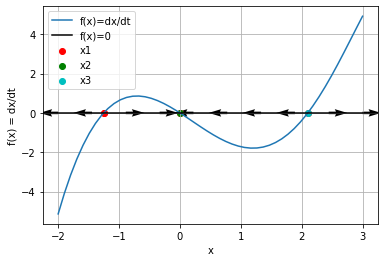

In [2]:
# Plot f(x)=dx/dt and highlight the x axis
X = np.linspace(-2,3)
f = lambda x: x**3-x-np.e**x+1
plt.figure()
plt.plot(X,[f(x) for x in X],label='f(x)=dx/dt')
plt.axhline(y=0,c='black',label='f(x)=0')
plt.xlabel('x')
plt.ylabel('f(x) = dx/dt')

# Plot the phase line
xs = np.linspace(-2,3,10)
ys = [0 for i in range(len(xs))]
us = []
vs = [0 for i in range(len(xs))]
for i in range(len(xs)):
    if f(xs[i])>0:
        us.append(1)
    else:
        us.append(-1)
plt.quiver(xs,ys,us,vs)

# Mark all equilibrium points, i.e., we mark all the roots of f(x)=0
roots_x = [fsolve(f, i) for i in [-1,0,2]]
roots_y = [0 for i in range(3)]
plt.scatter(roots_x,roots_y,c='red')

trials = [-1, 0, 2]
colors = ['r','g','c']
for i in range(len(trials)):
    plt.scatter([fsolve(f, trials[i])], [0], c=colors[i], label = 'x{index}'.format(index=i+1))

plt.grid()
plt.legend()
plt.show()

As we can see from the graph above, $x1$ and $x3$ are unstable and $x2$ is stable.

Now let's find the smallest equilibrium point with an accuracy of 4 decimals.\
For convenience, we use $\textit{fsolve()}$ function to calculate the smallest root of $f(x) = dx/dt = 0$

In [3]:
round(float(fsolve(f,-1)),4)

-1.253

Alternatively, we may use the bisection method to find the root of $f(x) = dx/dt = 0$.\
(Note: the function for naive bisection method was implemented from my second homework.)

In [4]:
def naive_bisection(f, a, b, e):
    """
    This function gives a root of function f between the interval (a, b) with error e.
    i.e., we return x such that f(x) < e
    """
    x = (a+b)/2
    i = 0
    while abs(f(x)) >= e:
        if f(a)*f(x) < 0:
            b = x
            x = (a+x)/2
        else:
            a = x
            x = (b+x)/2          
    return x

root = naive_bisection(f, -2, -1, 1e-4)
round(root, 3)

-1.253

In conclusion, we've got the smallest equilibrium point $x = -1.253$.